First step was to create the table and import the files into pgAdmin.
After that created the queries for the question 1 through 8 using 
the different techniques learned through class and the assignments.
Then made a connection by using psycopg2 pgAdmin and using pandas.io.sql 
to read the sql from progres into a pandas dataframe to be able to 
manlipulate in pandas.  Then graph the new information into a graph to be
able to visualize the data.

In [ ]:
# from sqlalchemy import create_engine

In [2]:
# engine = create_engine('postgresql://localhost:5432/Employment')
# connection = engine.connect()

In [1]:
# Use psycopg2 to connect to postgres database and pandas.io.sql to read the sql database

import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'psycopg2'

In [33]:
# Make the connection to pgAdmin calling Employment db and calling salaries table 
# and putting in the pandas dataframe

connection = pg.connect("host='127.0.0.1' dbname=Employment user=postgres password='reddragon1189'")
df_salaries = pd.read_sql_query('select * from salaries',con=connection)
df_salaries.head()

,emp_no,salary,from_date,end_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [34]:
df_salaries.loc[df_salaries['emp_no'] == 499942]

,emp_no,salary,from_date,end_date
299966,499942,40000,1998-03-28,1999-03-28


In [35]:
#Calling titles table and putting in the pandas dataframe
df_title = pd.read_sql_query('select * from titles',con=connection)
df_title.head()


,dept_no,title,from_date,end_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [36]:
df_title.loc[df_title['dept_no'] == 499942]

,dept_no,title,from_date,end_date
443224,499942,Technique Leader,1998-03-28,9999-01-01


In [18]:
# Renaming the dept_no column to emp_no column to be able to merge the two dataframes
title_df = df_title.rename(columns ={'dept_no': 'emp_no'})
title_df.head()

,emp_no,title,from_date,end_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [19]:
# Merging the title and salaries dataframe

combined_df = pd.merge(title_df, df_salaries, on ='emp_no', how = 'inner')
combined_df.head()

,emp_no,title,from_date_x,end_date_x,salary,from_date_y,end_date_y
0,10001,Senior Engineer,1986-06-26,9999-01-01,60117,1986-06-26,1987-06-26
1,10002,Staff,1996-08-03,9999-01-01,65828,1996-08-03,1997-08-03
2,10003,Senior Engineer,1995-12-03,9999-01-01,40006,1995-12-03,1996-12-02
3,10004,Engineer,1986-12-01,1995-12-01,40054,1986-12-01,1987-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,40054,1986-12-01,1987-12-01


In [20]:
# Group the new dataframe by title and getting average of salary
combined_df = combined_df.groupby(['title'])['salary'].mean()


In [21]:
combined_df.head(10)

title
Assistant Engineer    48493.204786
Engineer              48539.781423
Manager               51531.041667
Senior Engineer       48506.751806
Senior Staff          58503.286614
Staff                 58465.271904
Technique Leader      48580.505772
Name: salary, dtype: float64

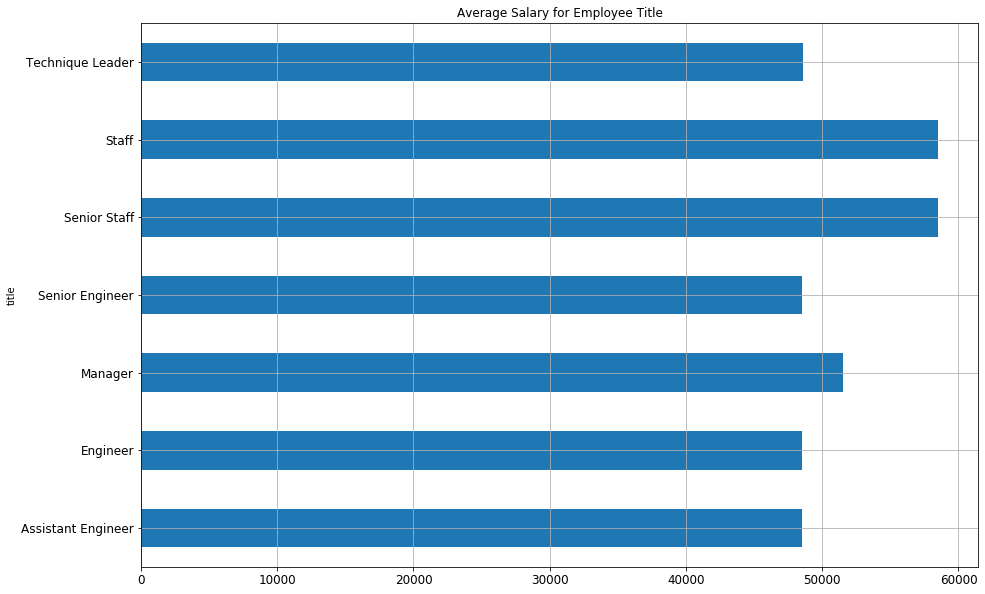

In [27]:
# Plotting and saving the average salary barh 
combined_df.plot(kind ='barh', title = 'Average Salary for Employee Title',\
                 figsize = (15,10), fontsize = 12, grid = True)
plt.savefig('AvgSalary.png')

In [23]:
# Just calling the remaining tables
df_employees = pd.read_sql_query('select * from employees',con=connection)
df_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [24]:
df_departments = pd.read_sql_query('select * from departments',con=connection)
df_departments.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [25]:
dept_emp_df = pd.read_sql_query('select * from dept_emp',con=connection)
dept_emp_df.head()

,emp_no,dept_no,from_date,end_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [26]:
dept_manager_df = pd.read_sql_query('select * from dept_manager',con=connection)
dept_manager_df.head()

,dept_no,emp_no,from_date,end_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21
